In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

In [2]:
x, y = make_blobs(centers=2, random_state=42)

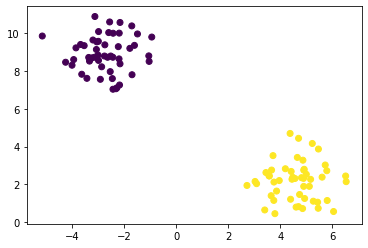

In [3]:
plt.scatter(x[:, 0], x[:, 1], c=y)

In [36]:
class CustomLogisticReg:
    
    def __init__(self, lr = .1, max_iters = 50):
        
        self.lr = lr
        self.max_iters = max_iters
        
    def fit(self, x, y):
        
        x = np.hstack([np.ones((x.shape[0], 1)), x])
        
        self.theta = np.random.randn(x.shape[1], 1)
        
        for i in range(self.max_iters):
            
            self.gradient_accend(x, y)
            
    def gradient_accend(self, x, y):
        
        delta_theta = self.gradient(x, y)
        
        self.theta += delta_theta
        
    def gradient(self, x, y):
        
        ya = y.reshape(-1, 1)
        yp = self.hypo(x)
        
        diff = (ya - yp)
        
        dlltheta = np.dot(x.T, diff)/len(x)
        
        return dlltheta * self.lr
        
    def hypo(self, x):
        
        g = np.dot(x, self.theta)
        return 1/(1 + np.exp(-g))
    
    def predict(self, x):
        x = np.hstack([np.ones((x.shape[0], 1)), x])
        result = self.hypo(x)
        return (result > .5).astype(int).flatten()
    
    def score(self, x, y):
        
        yp = self.predict(x)
        return (yp == y).mean()

In [37]:
model = CustomLogisticReg()

In [38]:
model.fit(x, y)

In [39]:
model.theta

array([[-3.1000353 ],
       [ 2.14884616],
       [-0.50627904]])

In [40]:
model.predict(x[:10])

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 0])

In [41]:
y[:10]

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 0])

In [42]:
model.score(x, y)

1.0